In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import sys
sys.path.append(os.path.join(os.path.abspath(''), '..'))
from utils.dla import get_neighbors
from utils.graph import to_graph

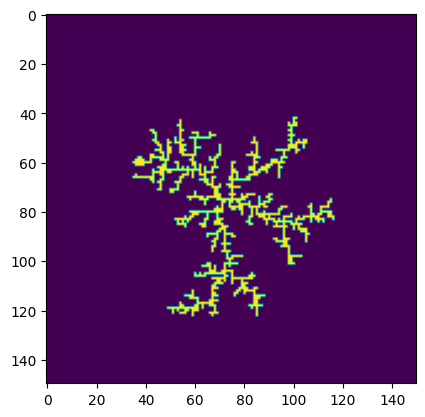

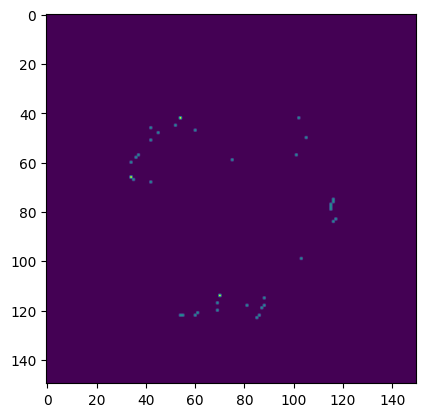

In [2]:
grid_df = pd.read_parquet('../data/0b362cee-93de-4351-a234-a3513a304d1c_grid.parquet')
grid = grid_df.iloc[-1].to_numpy().reshape(150, 150)
distribution_df = pd.read_parquet('../data/0b362cee-93de-4351-a234-a3513a304d1c_distribution.parquet')
distribution = distribution_df.iloc[-1].to_numpy().reshape(150, 150)

plt.imshow(grid)
plt.show()
plt.imshow(distribution);

In [5]:
def encode_positions(positions, T=150, harmonics=3):
    x, y = positions[:, 0], positions[:, 1]
    x_embed = np.concatenate(
        [np.sin(2*np.pi*x/T*(i+1)) for i in range(harmonics)] + \
        [np.cos(2*np.pi*x/T*(i+1)) for i in range(harmonics)]
        ).reshape(-1, harmonics*2)
    y_embed = np.concatenate(
        [np.sin(2*np.pi*y/T*(i+1)) for i in range(harmonics)] + \
        [np.cos(2*np.pi*y/T*(i+1)) for i in range(harmonics)]
        ).reshape(-1, harmonics*2)
    return np.concatenate([x_embed, y_embed], axis=1)

neighbors = get_neighbors(grid)
node_positions = np.argwhere(neighbors > 0)

print('Node positions')
print(node_positions.shape)
print(node_positions)

X1, X2 = np.meshgrid(node_positions[:,0], node_positions[:,0])
Y1, Y2 = np.meshgrid(node_positions[:,1], node_positions[:,1])

D = np.abs(X1 - X2) + np.abs(Y1 - Y2)
edges = np.argwhere(D == 1)

print('Edges')
print(edges.shape)
print(edges)

input_nodes = np.concatenate([encode_positions(node_positions), grid[node_positions[:, 0], node_positions[:, 1]].reshape(-1, 1)], axis=1)

print('Input nodes')
print(input_nodes.shape)
print(input_nodes)

dist_grid = grid + distribution
target_nodes = dist_grid[node_positions[:, 0], node_positions[:, 1]].reshape(-1, 1)

print('Target nodes')
print(target_nodes.shape)
print(target_nodes)

Node positions
(2194, 2)
[[ 41 100]
 [ 41 101]
 [ 42  54]
 ...
 [123  59]
 [123  67]
 [123  85]]
Edges
(7346, 2)
[[   0    1]
 [   0    4]
 [   1    0]
 ...
 [2191 2182]
 [2192 2185]
 [2193 2189]]
Input nodes
(2194, 13)
[[ 0.98927233  0.98927233  0.98228725 ... -0.8660254  -0.88620358
   0.        ]
 [ 0.98228725  0.9735789   0.9735789  ... -0.82114921 -0.84432793
   0.        ]
 [ 0.9735789   0.9735789   0.96316257 ...  0.74314483 -0.79652992
   0.        ]
 ...
 [-0.87630668 -0.92977649 -0.92977649 ...  0.72896863  0.53582679
   0.        ]
 [-0.92977649 -0.92977649 -0.92977649 ... -0.63742399 -0.72896863
   0.        ]
 [-0.92977649 -0.92977649 -0.92977649 ... -0.53582679 -0.30901699
   0.        ]]
Target nodes
(2194, 1)
[[0.   ]
 [0.   ]
 [0.05 ]
 ...
 [0.   ]
 [0.   ]
 [0.025]]


In [6]:
to_graph(grid, distribution)

(array([[ 41, 100],
        [ 41, 101],
        [ 42,  54],
        ...,
        [123,  59],
        [123,  67],
        [123,  85]]),
 array([[   0,    1],
        [   0,    4],
        [   1,    0],
        ...,
        [2191, 2182],
        [2192, 2185],
        [2193, 2189]]),
 array([[ 0.98927233,  0.98927233,  0.98228725, ..., -0.8660254 ,
         -0.88620358,  0.        ],
        [ 0.98228725,  0.9735789 ,  0.9735789 , ..., -0.82114921,
         -0.84432793,  0.        ],
        [ 0.9735789 ,  0.9735789 ,  0.96316257, ...,  0.74314483,
         -0.79652992,  0.        ],
        ...,
        [-0.87630668, -0.92977649, -0.92977649, ...,  0.72896863,
          0.53582679,  0.        ],
        [-0.92977649, -0.92977649, -0.92977649, ..., -0.63742399,
         -0.72896863,  0.        ],
        [-0.92977649, -0.92977649, -0.92977649, ..., -0.53582679,
         -0.30901699,  0.        ]]),
 array([[0.   ],
        [0.   ],
        [0.05 ],
        ...,
        [0.   ],
        [0